# 1.LOADING DATA


In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('../data/interim/handled_missing_values.csv')

In [16]:
df.head()

Gender                0
Height                0
Weight                0
Cholesterol           0
BMI                   0
Blood_Glucose         0
Bone_Density          0
Vision                0
Hearing               0
Physical_Activity     0
Smoking               0
Alcohol               0
Diet                  0
Chronic_Diseases      0
Medication            0
Family_History        0
Cognitive_Function    0
Mental_Health         0
Sleep                 0
Stress                0
Pollution             0
Sun_Exposure          0
Education             0
Income                0
Age                   0
Systolic_BP           0
Diastolic_BP          0
dtype: int64

In [11]:
# Hiển thị tất cả các cột và hàng
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# 2. TÍNH TOÁN HỆ SỐ TƯƠNG QUAN

In [12]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
# Chuyển biến phân loại thành biến số
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,Smoking,Alcohol,Diet,Chronic_Diseases,Medication,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,1,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,2,1,1,2,2,1,0,44.059172,2,1,2.797064,5.142344,7.108975,2,2,89,151,109
1,1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,1,0,1,0,2,1,1,45.312298,2,2,9.339930,7.272720,3.918489,2,2,77,134,112
2,0,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,2,2,1,0,2,1,2,56.246991,3,1,9.234637,8.500386,5.393408,2,2,70,160,101
3,0,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,2,2,1,0,0,0,2,55.196092,3,1,4.693446,7.555511,2.745578,2,1,52,133,94
4,0,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,1,1,0,3,2,1,0,53.023379,2,2,4.038537,9.429097,3.878435,2,0,79,170,106


In [13]:

correlation = df.corr()
correlation

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,Smoking,Alcohol,Diet,Chronic_Diseases,Medication,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
Gender,1.000000,0.717322,0.566511,-0.005063,0.142106,0.007766,-0.026159,-0.009677,0.004466,-0.024434,0.016654,0.014338,-0.009409,0.005824,0.007412,0.018428,0.004205,-0.021671,0.019013,-0.012584,-0.014511,0.004378,0.018657,-0.028838,0.021714,-0.003119,0.011674
Height,0.717322,1.000000,0.398371,-0.027233,-0.222789,0.011990,-0.023558,-0.009272,0.009461,-0.033521,0.011659,-0.004960,-0.028934,0.074527,0.015418,-0.034413,0.018231,0.001687,-0.009392,-0.006537,-0.028681,0.001900,0.027658,-0.039367,0.020322,-0.010840,0.023508
Weight,0.566511,0.398371,1.000000,0.041859,0.800150,0.015960,-0.008140,0.000436,0.008944,0.000627,0.015235,0.001709,0.021480,-0.139347,-0.045929,0.102335,0.006220,-0.012745,0.040154,0.016620,-0.029717,-0.013118,0.011401,-0.033797,0.002521,-0.013897,0.005607
Cholesterol,-0.005063,-0.027233,0.041859,1.000000,0.065532,0.189589,-0.401220,-0.382170,0.328465,-0.001160,-0.062432,0.007644,0.028135,0.006509,-0.014484,-0.006518,-0.230204,0.018620,0.002145,0.001813,0.001632,0.009417,-0.038136,-0.044628,0.432368,0.267289,0.267601
BMI,0.142106,-0.222789,0.800150,0.065532,1.000000,0.012700,0.003840,0.003684,0.005878,0.022719,0.008235,0.003735,0.040156,-0.196428,-0.060328,0.131378,-0.006549,-0.016594,0.047344,0.021403,-0.009308,-0.014736,-0.007156,-0.009204,-0.008042,-0.001913,-0.007905
Blood_Glucose,0.007766,0.011990,0.015960,0.189589,0.012700,1.000000,-0.393006,-0.396912,0.311569,-0.011859,-0.068818,0.003792,-0.003218,0.009716,0.011489,-0.036179,-0.209052,0.001250,0.024602,-0.021140,-0.004916,0.021439,0.020392,-0.041853,0.428573,0.266494,0.243431
Bone_Density,-0.026159,-0.023558,-0.008140,-0.401220,0.003840,-0.393006,1.000000,0.846140,-0.667803,0.008675,0.165950,-0.027542,-0.009350,-0.023803,-0.003114,-0.007453,0.475936,-0.011534,-0.015805,-0.033976,0.013555,-0.003921,-0.022547,0.017037,-0.937712,-0.608813,-0.567631
Vision,-0.009677,-0.009272,0.000436,-0.382170,0.003684,-0.396912,0.846140,1.000000,-0.639199,0.004485,0.166029,-0.036638,0.003997,-0.024411,0.002713,-0.002807,0.466071,0.010613,-0.003867,-0.023664,0.003519,-0.011532,-0.012761,0.023605,-0.899692,-0.577645,-0.544801
Hearing,0.004466,0.009461,0.008944,0.328465,0.005878,0.311569,-0.667803,-0.639199,1.000000,-0.016908,-0.133296,0.022933,0.019370,0.014940,-0.023640,-0.004781,-0.384928,0.010297,0.016945,0.027843,-0.013024,0.019801,0.008539,-0.011292,0.712374,0.450164,0.438638
Physical_Activity,-0.024434,-0.033521,0.000627,-0.001160,0.022719,-0.011859,0.008675,0.004485,-0.016908,1.000000,0.003967,0.012618,0.022411,0.005138,-0.001569,0.019437,0.012129,-0.019702,0.031598,0.005560,-0.011693,0.003066,0.010592,-0.008774,-0.000136,0.018741,-0.007879


# 3. THỂ HIỆN TƯƠNG QUAN BẰNG TRỰC QUAN
## 3.1 HEATMAP

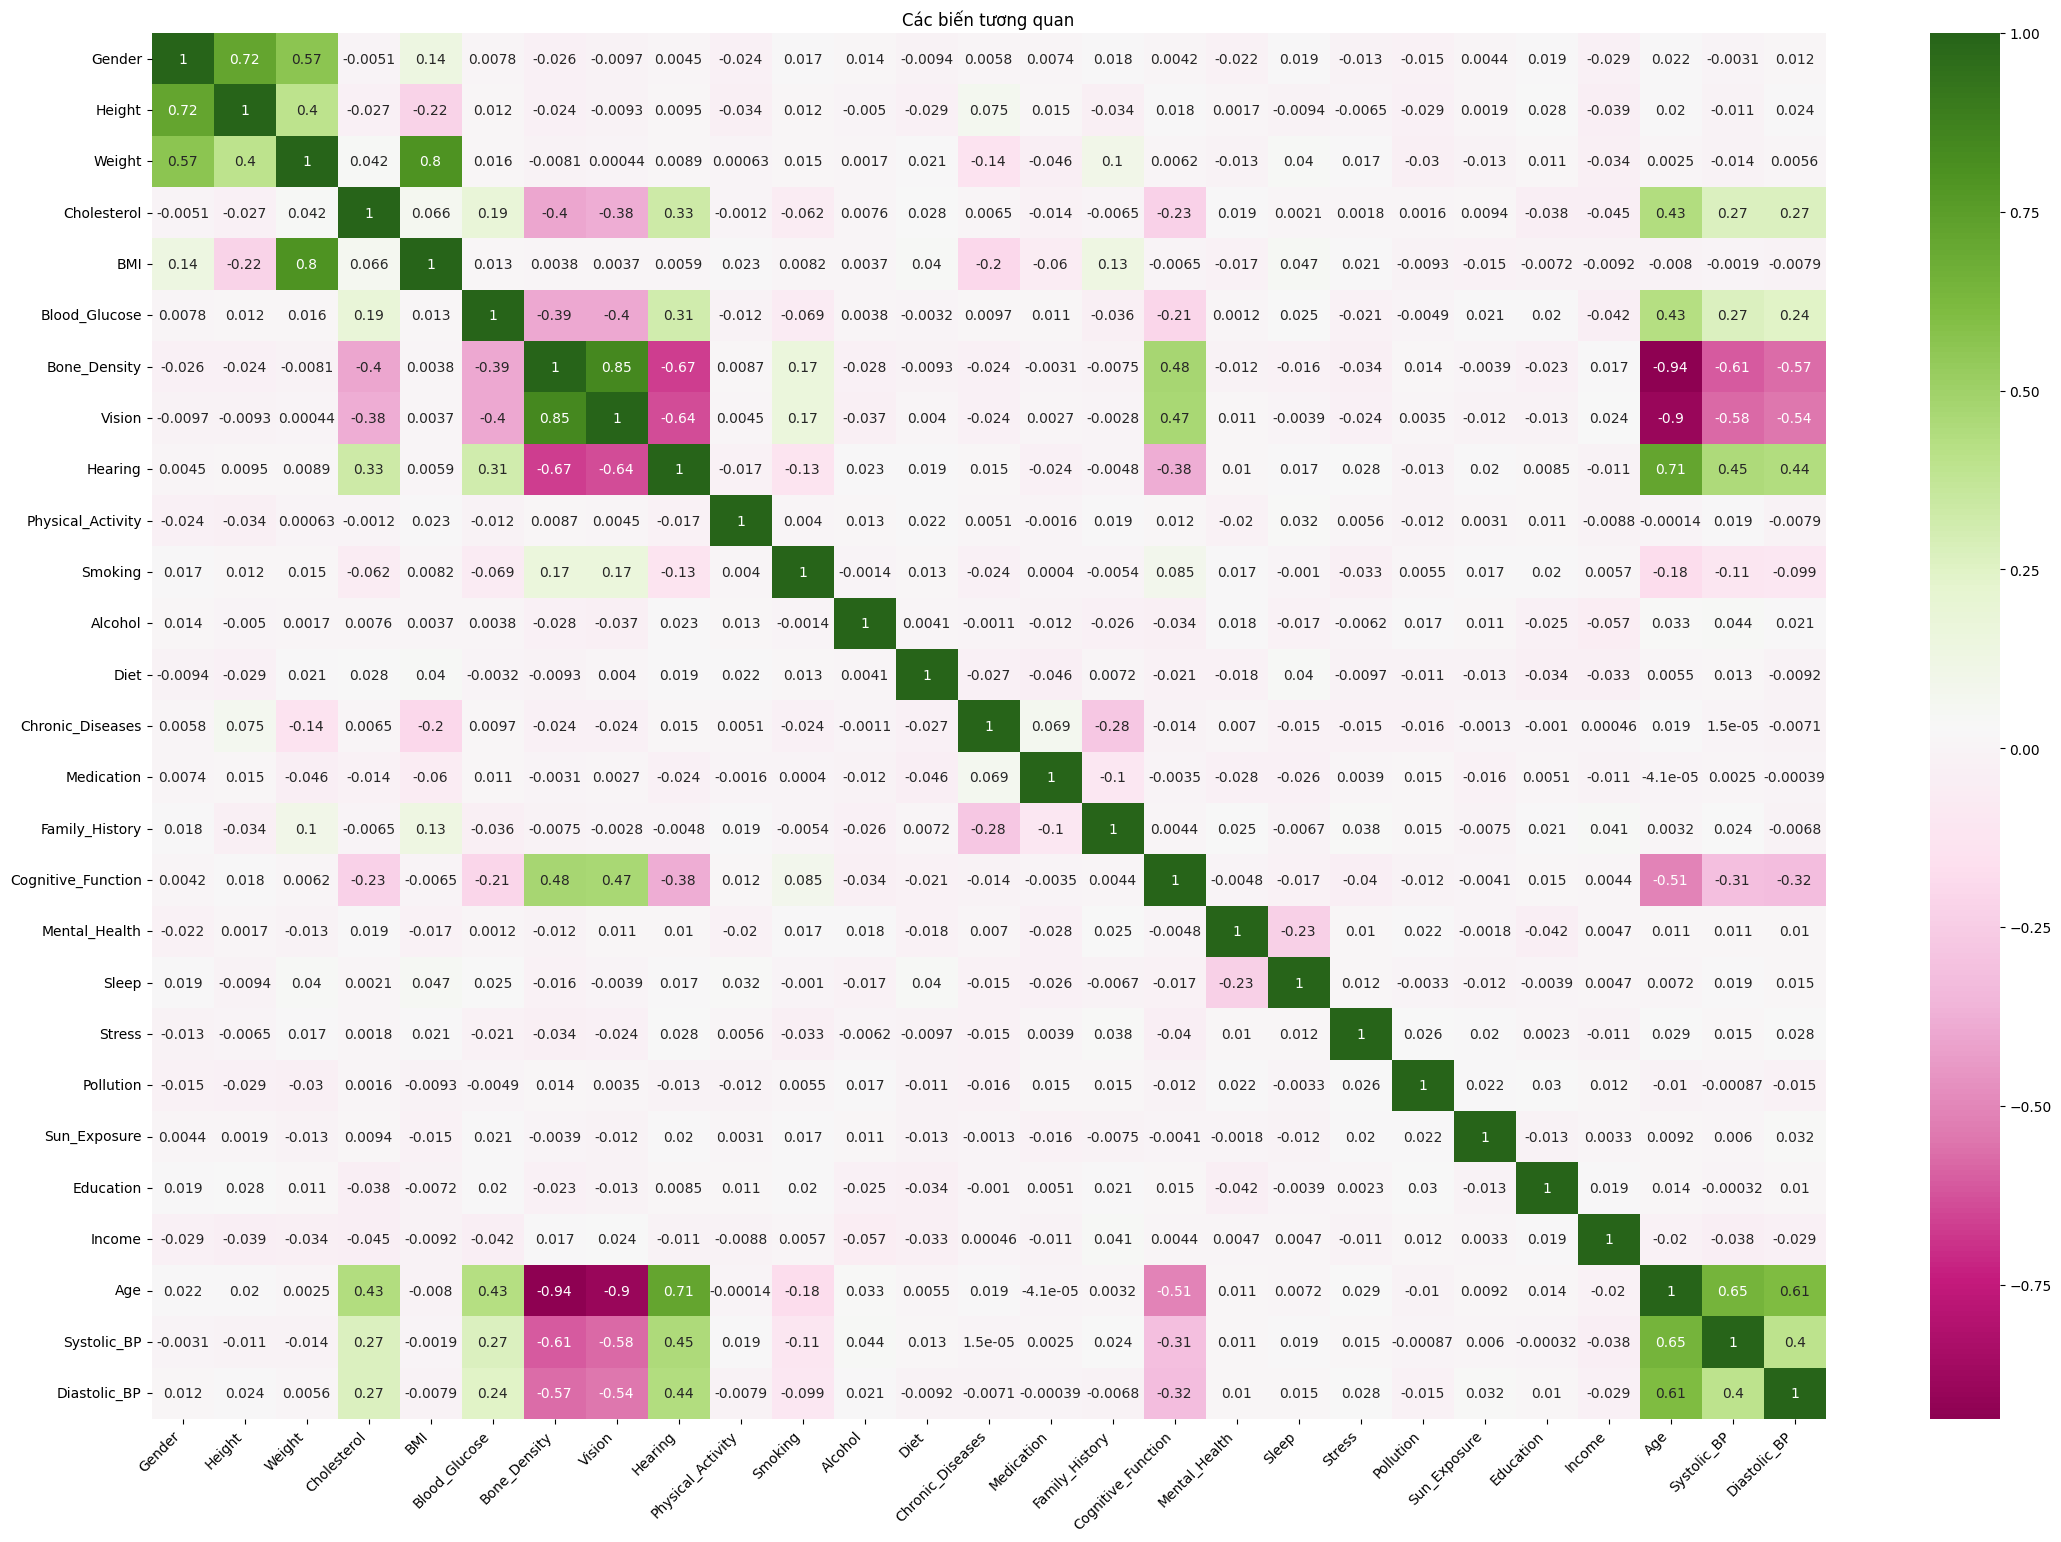

In [14]:
plt.figure(figsize=(27,18))
sns.heatmap(data=correlation, annot= True, cmap="PiYG", cbar= True)
plt.title("Các biến tương quan")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### NHẬN XÉT
#### Tương quan ảnh hưởng tích cực (màu đậm):
- __Gender__ và __Height__ có tương quan khá cao (~0.72), cho thấy giới tính có thể liên quan đến chiều cao.
- __BMI__ và __Weight__ có tương quan rất mạnh (~0.86), điều này hợp lý vì BMI được tính dựa trên cân nặng.
- __Systolic_BP__ và __Diastolic_BP__ có tương quan mạnh (~0.61), cho thấy khi huyết áp tâm thu tăng, huyết áp tâm trương cũng có xu hướng tăng.
- __Age__ và __Diastolic_BP__ có tương quan cao (~0.57), cho thấy huyết áp tâm trương có xu hướng tăng theo độ tuổi.
#### Tương quan ảnh hưởng tiêu cực:
- __Mental_Health__ và __Pollution__ có tương quan âm (~-0.26), chỉ ra mối liên hệ tiêu cực giữa sức khỏe tinh thần và mức độ ô nhiễm.
- __Cognitive_Function__ và __Age__ có tương quan âm (~-0.38), cho thấy chức năng nhận thức có xu hướng giảm khi tuổi tăng.
- __Vision__ và __Age__ có tương quan âm đáng kể (~-0.49), điều này phù hợp với thực tế là thị lực có xu hướng giảm theo tuổi.
#### Mối quan hệ giữa các chỉ số sức khỏe:
- __Bone_Density__ có mối quan hệ âm với __Age__ (~-0.67), cho thấy mật độ xương giảm khi tuổi tăng.
- __Cholesterol__ và __Chronic_Diseases__ có mối liên hệ tích cực (~0.43), cho thấy mức __cholesterol__ có thể tăng khi mắc các bệnh mãn tính.
#### Các biến không có mối tương quan mạnh:
- Nhiều biến số như __Pollution__ và __Sun_Exposure__ có giá trị tương quan khá thấp với hầu hết các biến khác, cho thấy các yếu tố này có thể không ảnh hưởng nhiều đến các chỉ số khác.

## 3.2 REGPLOT

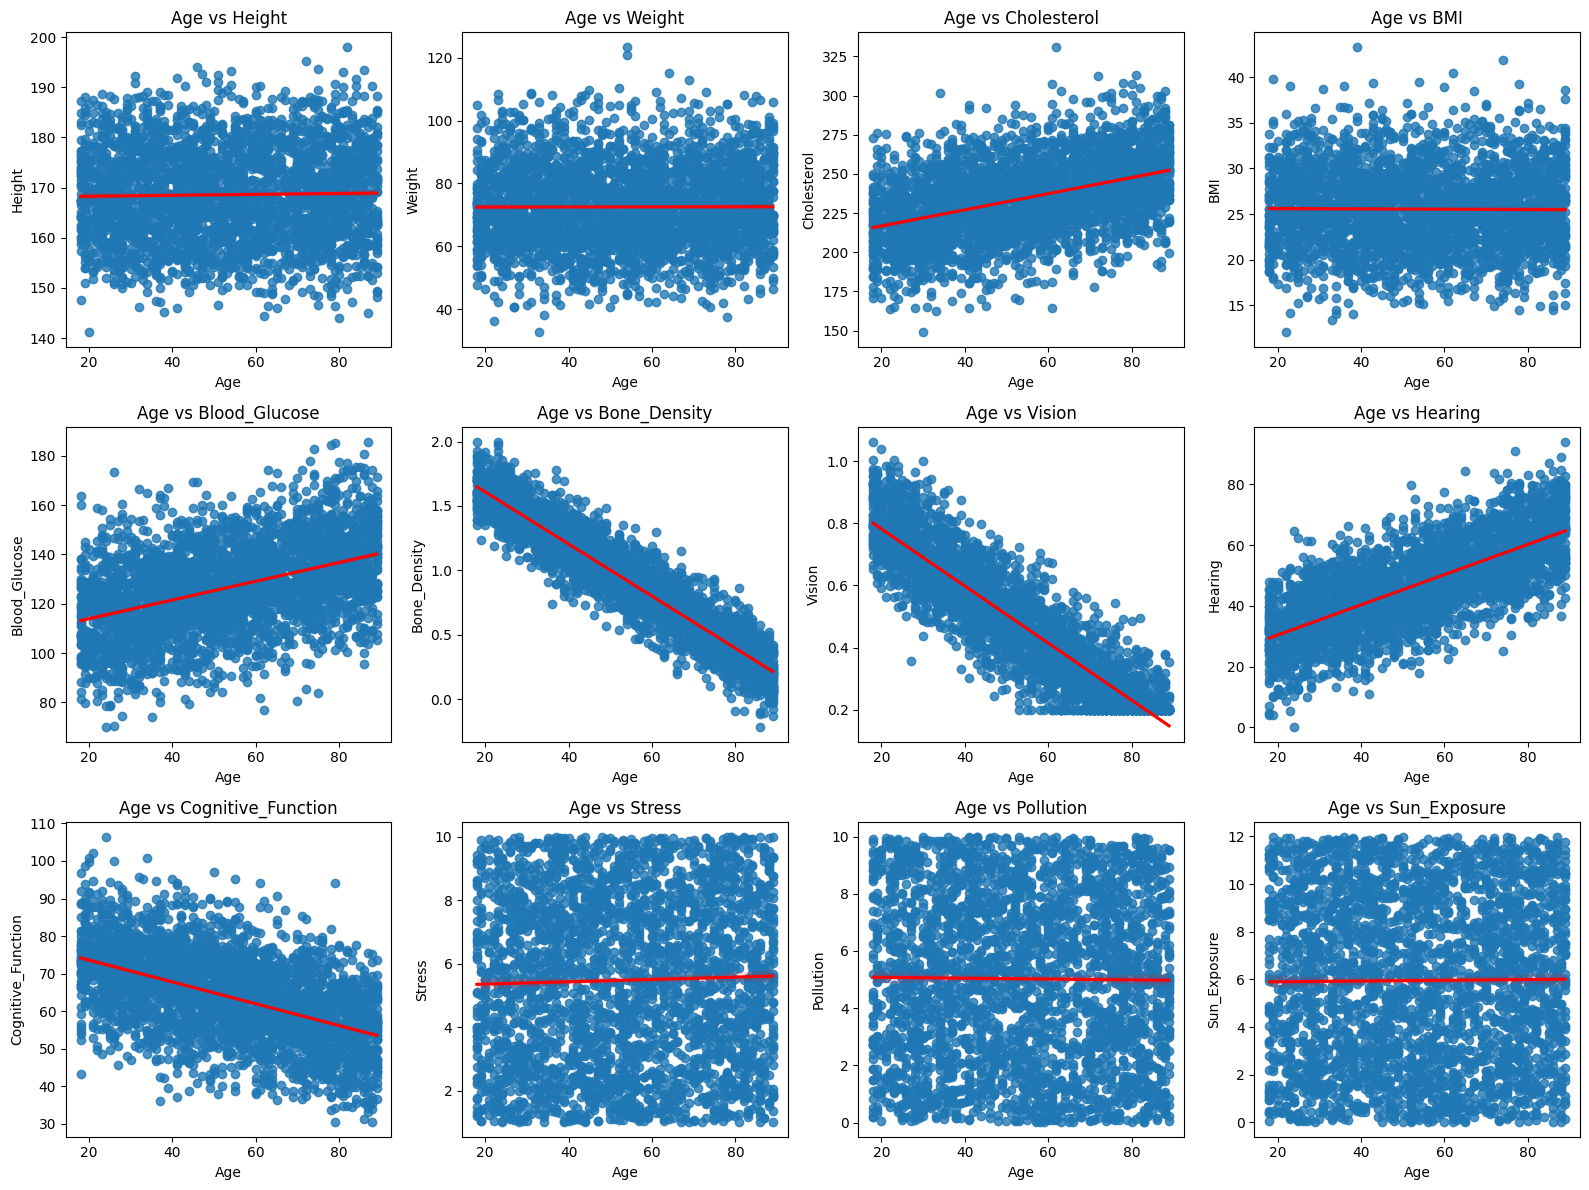

In [15]:
cols = df.select_dtypes(include=['float64']).columns
if 'Age' in cols:
    cols = cols.drop('Age')  # Loại bỏ 'Age' nếu tồn tại

n_rows = 3
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

# Vẽ biểu đồ regplot cho từng cột số so với 'Age'
for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c  
        if i < len(cols):
            ax_i = ax[r, c]
            sns.regplot(data=df, x='Age', y=cols[i], ax=ax_i, line_kws={"color": "red"})
            ax_i.set_title(f'Age vs {cols[i]}')

# Ẩn các subplot trống
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()


### NHẬN XÉT 
#### Age vs Height, Weight, BMI:
Chiều cao, cân nặng và BMI có xu hướng không thay đổi nhiều theo độ tuổi, thể hiện qua các đường hồi quy nằm ngang. Điều này cho thấy tuổi không có ảnh hưởng đáng kể đến ba yếu tố này.

#### Age vs Blood Glucose:
Có một mối quan hệ tăng nhẹ giữa tuổi và mức độ đường huyết. Điều này có thể cho thấy rằng khi tuổi tăng, nguy cơ tăng đường huyết (hoặc nguy cơ mắc các bệnh liên quan như tiểu đường) cũng có xu hướng tăng.

#### Age vs Bone Density:
Có mối tương quan âm rất rõ ràng giữa tuổi và mật độ xương, với mật độ xương giảm mạnh khi tuổi tăng. Điều này là hợp lý vì mật độ xương thường giảm dần theo tuổi do mất chất khoáng trong xương, dễ dẫn đến các vấn đề như loãng xương.

#### Age vs Vision và Age vs Hearing:
Vision (thị lực) và Hearing (thính lực) có xu hướng giảm đáng kể khi tuổi tăng. Điều này phản ánh sự suy giảm của các giác quan theo tuổi tác, một hiện tượng phổ biến ở người lớn tuổi.

#### Age vs Cognitive Function:
Chức năng nhận thức có mối tương quan âm nhẹ với tuổi, cho thấy sự suy giảm dần theo thời gian. Tuy nhiên, mức độ suy giảm không quá mạnh như các giác quan hoặc mật độ xương.

#### Age vs Stress, Pollution, Sun Exposure:
Các biến này hầu như không có mối quan hệ đáng kể với tuổi tác, thể hiện qua đường hồi quy phẳng. Điều này có thể cho thấy mức độ stress, tiếp xúc với ô nhiễm hoặc ánh nắng không chịu ảnh hưởng đáng kể từ tuổi tác trong tập dữ liệu này.